In [1]:
# 0 - layer_density
aerofoil_profile = [
    (0.0, 0.0, 0.0),
    (1.0, 0.5, 0.0),
    (2.0, 0.5, 0.0),
    (3.0, 1.0, 0.0),
    (4.0, 1.0, 0.0),
    (5.0, 1.0, 0.0),
    (6.0, 1.0, 0.0),
    (7.0, 1.5, 0.0),
    (8.0, 1.5, 0.0),
    (9.0, 2.0, 0.0),
    (10.0, 2.0, 0.0),
    (11.0, 2.0, 0.0),
    (12.0, 1.5, 0.0),
    (13.0, 1.5, 0.0),
    (14.0, 1.5, 0.0),
    (15.0, 1.5, 0.0),
    (16.0, 1.0, 0.0),
    (17.0, 1.0, 0.0),
    (18.0, 0.5, 0.0),
    (19.0, 1.0, 0.0),
    (20.0, 1.0, 0.0),
    (21.0, 1.5, 0.0),
    (22.0, 2.0, 0.0),
    (22.0, 3.0, 0.0),
    (22.0, 4.0, 0.0),
    (22.0, 5.0, 0.0),
    (21.0, 5.5, 0.0),
    (20.0, 6.0, 0.0),
    (19.0, 6.5, 0.0),
    (18.0, 6.5, 0.0),
    (17.0, 6.5, 0.0),
    (16.0, 6.0, 0.0),
    (15.0, 6.0, 0.0),
    (14.0, 6.0, 0.0),
    (13.0, 5.5, 0.0),
    (12.0, 5.0, 0.0),
    (11.0, 5.0, 0.0),
    (10.0, 5.0, 0.0),
    (9.0, 4.5, 0.0),
    (8.0, 4.0, 0.0),
    (7.0, 4.0, 0.0),
    (6.0, 3.0, 0.0),
    (5.0, 3.0, 0.0),
    (4.0, 2.5, 0.0),
    (3.0, 2.0, 0.0),
    (2.0, 1.5, 0.0),
    (1.0, 1.0, 0.0)
]

scale_factor = 5.0 / 22.0

scaled_aerofoil_profile = [(a*scale_factor, b*scale_factor, c*scale_factor) for a, b, c in aerofoil_profile]


In [2]:
cuboid_profile = [
    (0.0, 0.0, 0.0),
    (1.0, 0.0, 0.0),
    (2.0, 0.0, 0.0),
    (3.0, 0.0, 0.0),
    (4.0, 0.0, 0.0),
    (5.0, 0.0, 0.0),
    (5.0, 0.5, 0.0),
    (5.0, 1.0, 0.0),
    (5.0, 1.5, 0.0),
    (4.0, 1.5, 0.0),
    (3.0, 1.5, 0.0),
    (2.0, 1.5, 0.0),
    (1.0, 1.5, 0.0),
    (0.0, 1.5, 0.0),
    (0.0, 1.0, 0.0),
    (0.0, 0.5, 0.0),
]

In [3]:
import numpy as np
from copy import deepcopy

LAYER_SPACING = 0.5

def extrude_profile(profile: list[tuple], depth: float, layer_spacing = LAYER_SPACING) -> tuple[list]:

    points_per_layer = len(profile)

    extruded_profile = deepcopy(profile)
    for k in range(int(depth / layer_spacing)):
        for i in range(points_per_layer):
            extruded_profile.append((extruded_profile[i][0], extruded_profile[i][1], (k + 1) * layer_spacing))

    faces = []


    i = 0
    while i + points_per_layer + 1 < len(extruded_profile):
        faces.append([i, i + points_per_layer + 1, i + 1])
        faces.append([i, i + points_per_layer, i + points_per_layer + 1])
        i += 1

    # Cap off the ends

    # left face

    left_edge = list(range(0, points_per_layer))

    left_edge.reverse()

    left_outer_point = (0.0, 0.0, -layer_spacing)
    right_outer_point = (0.0, 0.0, depth + layer_spacing)



    extruded_profile.append(left_outer_point)  # i=-2
    extruded_profile.append(right_outer_point)  # i=-1

    for i in range(points_per_layer):
        faces.append((i, i+1, len(extruded_profile) - 2))
        faces.append((len(extruded_profile) - 3 - i, len(extruded_profile) - 4 - i, len(extruded_profile) - 1))

    return extruded_profile, faces


In [4]:
aerofoil_vertices, aerofoil_faces = extrude_profile(scaled_aerofoil_profile, depth=15.0)
cuboid_vertices, cuboid_faces = extrude_profile(cuboid_profile, depth=15.0)

""

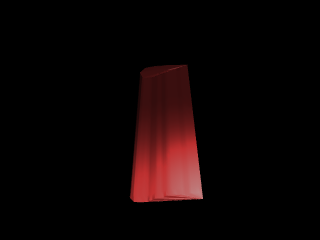

In [5]:
from glider.vehicle import Vehicle

aerofoil_vehicle = Vehicle(
    vertices=aerofoil_vertices,
    faces=aerofoil_faces,
    mass_kg=8.0,
    orientation=[90,180,-20]
)

aerofoil_vehicle.show()

""

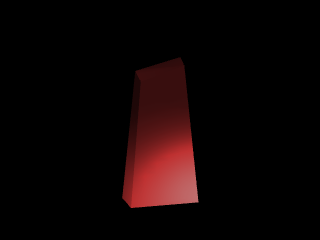

In [6]:
cuboid_vehicle = Vehicle(
    vertices=cuboid_vertices,
    faces=cuboid_faces,
    mass_kg=8.0,
    orientation=[90,180,-20]
)

cuboid_vehicle.show()

In [7]:
from glider.optimization import drop_test_glider

aerofoil_test_xml = drop_test_glider(
    *aerofoil_vehicle.create_glider_from_vertices(),
)

with open('aerofoil_drop_test.xml', 'w') as f:
    f.write(aerofoil_test_xml)

cuboid_test_xml = drop_test_glider(
    *cuboid_vehicle.create_glider_from_vertices(),
)

with open('cuboid_drop_test.xml', 'w') as f:
    f.write(cuboid_test_xml)

In [8]:
from glider.optimization import fitness_func

aerofoil_fitness = fitness_func(aerofoil_vehicle)
cuboid_fitness = fitness_func(cuboid_vehicle)

print(f'Aerofoil fitness: {aerofoil_fitness}')
print(f'Cuboid fitness: {cuboid_fitness}')

Aerofoil fitness: 32.73017620845507
Cuboid fitness: 27.827196995593148


In [10]:
import mediapy as media

media.show_video(frames, fps=2)

NameError: name 'frames' is not defined